#### Problem Statement
Based on the given data, Our task is to predict the Survival of the Titanic Passenger.

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics

In [6]:
df_train = pd.read_csv('train.csv')
df_train.head()
# df_train.shape

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [8]:
df_train.Sex.value_counts() 

male      577
female    314
Name: Sex, dtype: int64

In [9]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Now restricting the dataset only to those columns which are useful for predicting the Target column(Survival).

In [11]:
df_train = df_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [12]:
df_train.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Now filling the null age value

In [27]:
def fillage(cols):
    Age=cols[0]
    Pclass=cols[1]
    pagef = df_train[['Age','Pclass']].groupby(['Pclass']).mean()
    agelst=list(pagef['Age'])

    if pd.isnull(Age):
        if Pclass==1:
            return agelst[0]
        elif Pclass==2:
            return agelst[1]
        else:
            return agelst[2]
    else:
        return Age



In [28]:
df_train['Age']=df_train[['Age','Pclass']].apply(fillage,axis=1)

In [29]:
df_train.isnull().sum() # checking if there is any null value in Age

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [32]:
df_train.dropna(inplace=True) # dropping the 2 Embarked null values.
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [33]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

Sex and Embarked are of Object(Categorical) type. To make them useful for prediction, we use values as dummy columns.

In [34]:
df_train_dummied = pd.get_dummies(df_train,columns=['Sex'])
df_train_dummied = pd.get_dummies(df_train_dummied,columns=['Embarked'])
df_train_dummied.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


<AxesSubplot:>

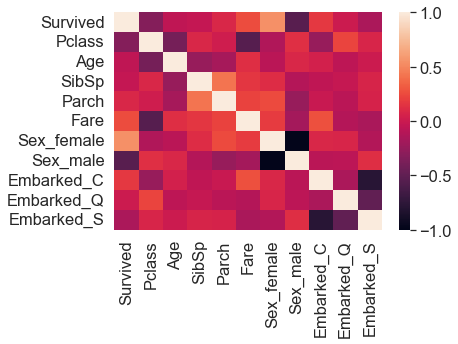

In [35]:
# checking which variables are correlated
plt.figure(figsize=(6,4))
sns.heatmap(df_train_dummied.corr())

Now creating a classifier which can predict the survival

In [36]:
used_features = ['Pclass','Age','SibSp','Parch','Sex_female','Sex_male','Embarked_C','Embarked_Q','Embarked_S']
x=df_train_dummied[used_features].values
y=df_train_dummied['Survived']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)
# print(xtrain.shape)
# print(xtest.shape)
# print(ytrain.shape)
# print(ytest.shape)

(622, 9)
(267, 9)
(622,)
(267,)


In [37]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)

LogisticRegression()

In [ ]:
# prediction on test data 
ypred = lr.predict(xtest)
ypred

In [40]:
metrics.confusion_matrix(ytest,ypred)

array([[143,  23],
       [ 20,  81]], dtype=int64)

In [41]:
metrics.accuracy_score(ytest,ypred) # accuracy score is about 84%

0.8389513108614233

In [42]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       166
           1       0.78      0.80      0.79       101

    accuracy                           0.84       267
   macro avg       0.83      0.83      0.83       267
weighted avg       0.84      0.84      0.84       267



Now the cofficients and the intercept of the predicted line 

In [43]:
lr.coef_

array([[-1.04402962, -0.04040954, -0.24426629, -0.04246574,  1.1939078 ,
        -1.19314617,  0.34658428, -0.02484395, -0.32097871]])

In [44]:
lr.intercept_

array([3.69162081])

In [ ]:
# Now predicting the probability that the entry has Survived label or not
# first column is the probability that the entry have survived label and the second column is the prob. that the entry dont have survive label.
lr.predict_proba(xtest) 